In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
filePaths = {}
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filePaths[filename] = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [174]:
training_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
training_dataset.dropna(inplace = True)
training_dataset.reset_index(drop=True, inplace=True)
display(training_dataset)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
694,58.0,58.595006
695,93.0,94.625094
696,82.0,88.603770
697,66.0,63.648685


In [176]:
class linear_regression_gradient_descent:
    weights = None
    n_iterations = None
    learning_rate = None
    input_features = None
    target_features = None
    n_instances = None
    n_input_features = None
    def __init__(self, input_features, target_features, weights, n_iterations, learning_rate):
        self.weights = weights
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.input_features = input_features
        self.target_features = target_features
        self.n_input_features = input_features.shape[1]
        self.n_instances = input_features.shape[0]
    def update_weight(self, index, gradient):
        self.weights.iloc[index, 0] -= self.learning_rate*gradient
    def calculate_cost(self):
        hypothesis = self.input_features.apply(self.calculate_hypothesis, axis = 1)
        target_features = self.target_features.iloc[:, 0]
        h_y_term = (hypothesis - target_features)**2
        return (1/(2*self.n_instances))*(h_y_term.sum())
    def calculate_hypothesis(self, instance):
        instance = pd.DataFrame(instance).T
        res = np.dot(instance.values, self.weights.values)
        return res.item()
    def calculate_gradient(self,feature_index):
        hypothesis = self.input_features.apply(self.calculate_hypothesis, axis = 1)
        xj = pd.DataFrame(self.input_features.iloc[:, feature_index])
        h_y_term = pd.DataFrame(hypothesis - self.target_features.iloc[:, feature_index-1]).T
        sum_term = np.dot(h_y_term.values, xj.values)
        sum_term = sum_term.item()
        return (1/self.n_instances)*sum_term
    def train(self):
        costs = []
        for i in range(self.n_iterations):
            clear_output(wait=True)
            print('Calculating gradients for iteration ', i)
            for j in range(self.n_input_features):
                gradient = self.calculate_gradient(j)
                self.update_weight(j, gradient)
            cost = self.calculate_cost()
            costs.append(cost)
            print('Cost after', i, ' iterations = ', cost)
            print('Weights after', i, ' iterations = ', self.weights)
        plt.plot(range(len(costs)), costs)
        print(self.weights)

In [178]:
from sklearn.preprocessing import StandardScaler
weights = pd.DataFrame([100,100])
n_iterations = 10000
learning_rate = 0.001
input_features = training_dataset.iloc[:, :-1]
n_input_features = input_features.shape[0]
target_features = training_dataset.iloc[:, -1:]
input_features.dropna(inplace = True)
input_features.columns = range(input_features.shape[1])
scaler = StandardScaler()
input_features = pd.DataFrame(scaler.fit_transform(input_features))
target_features = pd.DataFrame(scaler.fit_transform(target_features))
input_features = pd.concat([pd.Series([1] * (n_input_features)), input_features], axis = 1)

C:\Users\suman\AppData\Local\Temp\ipykernel_25768\416674095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_features.dropna(inplace = True)


Calculating gradients for iteration  9999
Cost after 9999  iterations =  0.004669438259254222
Weights after 9999  iterations =            0
0  0.004517
1  0.999812
          0
0  0.004517
1  0.999812


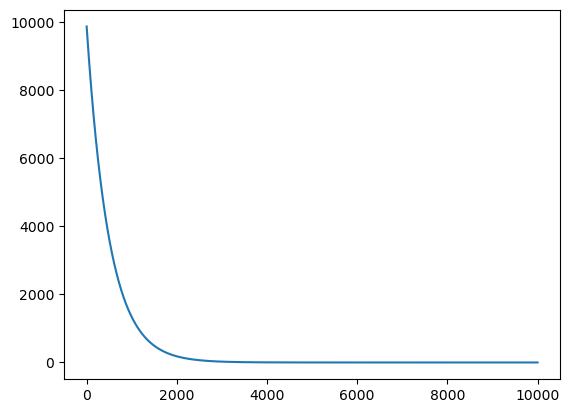

In [180]:
linear_regression_gd = linear_regression_gradient_descent(input_features, target_features, weights, n_iterations, learning_rate)
linear_regression_gd.train()

In [183]:
def predict(x):
    return 0.004517 + (0.999812*x)

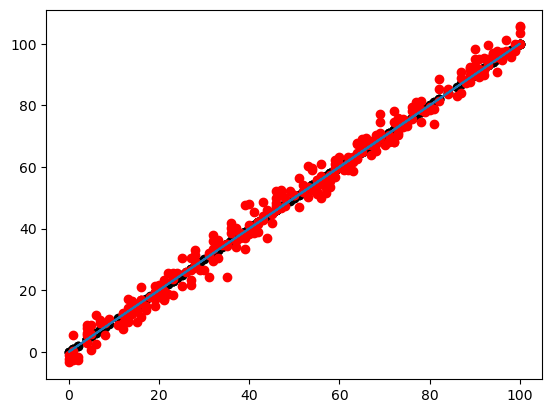

In [185]:
y_predicted = predict(test_dataset['x'])
plt.scatter(test_dataset['x'], y_predicted, color = 'black') # Plot the predicted dataset datapoints
plt.plot(test_dataset['x'], y_predicted) # Plot the line that was fitted
plt.scatter(test_dataset['x'], test_dataset['y'], color = 'red') # Plot the predicted dataset datapoints

In [187]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
r2_score(test_dataset['y'], y_predicted)

0.988828816665254